In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
movies_df = pd.read_csv('C:/Users/admin/OneDrive/Desktop/project/movies.csv')
movies_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [13]:
movies_df['VOTES'] = pd.to_numeric(movies_df['VOTES'].str.replace(',', ''), errors='coerce')
movies_df['Gross'] = pd.to_numeric(movies_df['Gross'].str.replace(',', ''), errors='coerce')

In [14]:
numerical_summary = movies_df[['RATING', 'VOTES', 'RunTime', 'Gross']].describe()

In [15]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Movie Ratings')

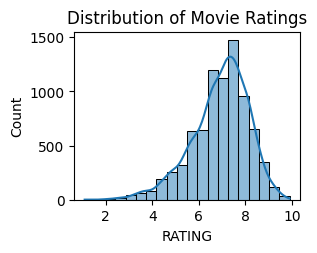

In [16]:
plt.subplot(2, 2, 1)
sns.histplot(movies_df['RATING'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Ratings')

Text(0.5, 1.0, 'Distribution of Votes')

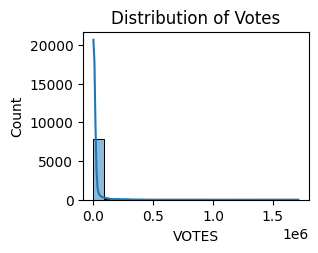

In [17]:
plt.subplot(2, 2, 2)
sns.histplot(movies_df['VOTES'].dropna(), bins=20, kde=True)
plt.title('Distribution of Votes')

Text(0.5, 1.0, 'Distribution of Runtime')

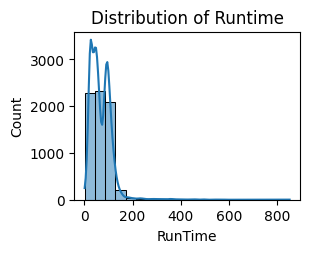

In [18]:
plt.subplot(2, 2, 3)
sns.histplot(movies_df['RunTime'].dropna(), bins=20, kde=True)
plt.title('Distribution of Runtime')

Text(0.5, 1.0, 'Distribution of Gross Earnings')

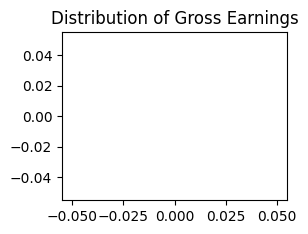

In [19]:
plt.subplot(2, 2, 4)
sns.histplot(movies_df['Gross'].dropna(), bins=20, kde=True)
plt.title('Distribution of Gross Earnings')

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

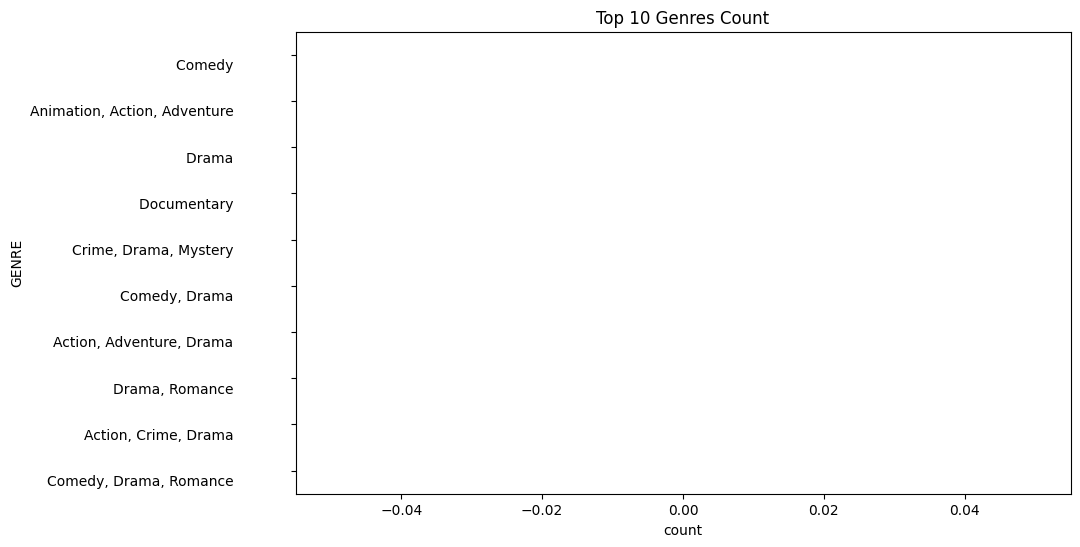

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y=movies_df['GENRE'].str.strip(), order=movies_df['GENRE'].value_counts().index[:10])
plt.title('Top 10 Genres Count')
plt.show()

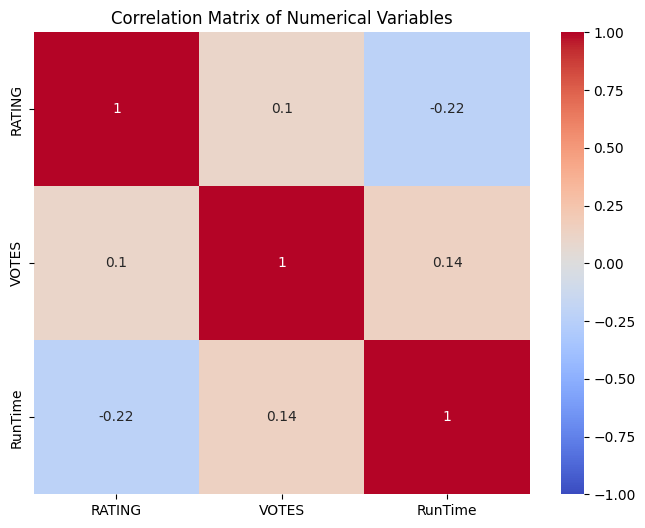

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(movies_df[['RATING', 'VOTES', 'RunTime']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [23]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Rating vs Votes')

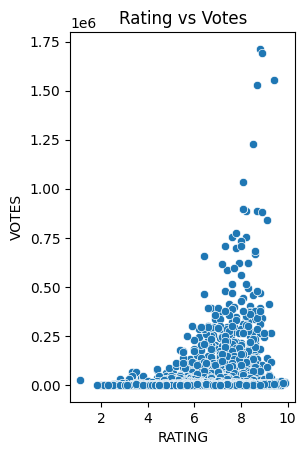

In [24]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='RATING', y='VOTES', data=movies_df)
plt.title('Rating vs Votes')

Text(0.5, 1.0, 'Rating vs Runtime')

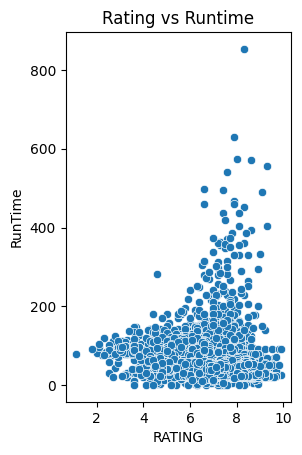

In [25]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='RATING', y='RunTime', data=movies_df)
plt.title('Rating vs Runtime')

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
movies_df['GENRE'] = movies_df['GENRE'].str.strip().str.replace('\n', '')

In [28]:
top_5_genres = movies_df['GENRE'].value_counts().index[:5]
filtered_df = movies_df[movies_df['GENRE'].isin(top_5_genres)]

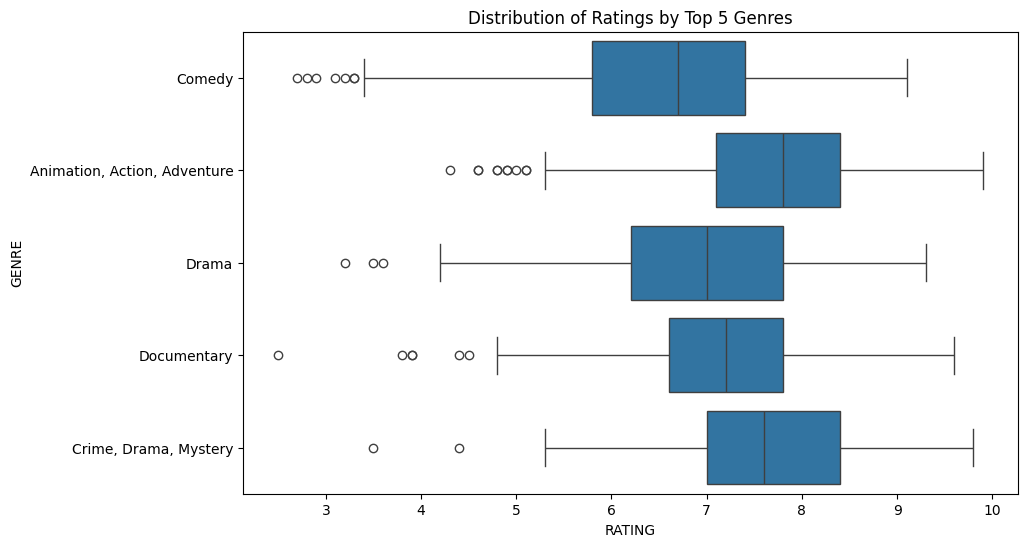

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RATING', y='GENRE', data=filtered_df, order=top_5_genres)
plt.title('Distribution of Ratings by Top 5 Genres')
plt.show()